# Feature Selection - Recursive Feature Elimination (RFE)

## 0. Introduction

This notebook contains:
  1. RFE for classification
  2. RFE for regression
  3. RFE Hyperparameters
    1. Explore number of features
    2. Automatically select number of features
    3. Which features were selected
    4. Explore base algorithm

## 1. RFE for classification

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, make_regression

In [3]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[
    ('rfe', rfe),
    ('m', model)
])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
print(f"Accuracy: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")

Accuracy: 0.880 (0.038)


## 2. RFE for regression

In [9]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[
    ('rfe', rfe),
    ('m', model)
])
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print(f"MAE: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")

MAE: -15.888 (1.276)


## 3. RFE Hyperparameters

### 3.1 Explore number of features

In [10]:
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
  return X, y

def get_models():
  models = dict()
  for i in range(2, 10):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    model = DecisionTreeClassifier()
    models[str(i)] = Pipeline(steps=[
        ('s', rfe),
        ('m', model)
    ])
  return models

def evaluate_models(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return n_scores

In [11]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_models(model, X, y)
  results.append(scores)
  names.append(name)
  print(f"{name}: {np.mean(scores):.3f} ({np.std(scores):.3f})")

2: 0.861 (0.033)
3: 0.861 (0.034)
4: 0.869 (0.032)
5: 0.882 (0.034)
6: 0.888 (0.034)
7: 0.895 (0.036)
8: 0.894 (0.034)
9: 0.896 (0.027)


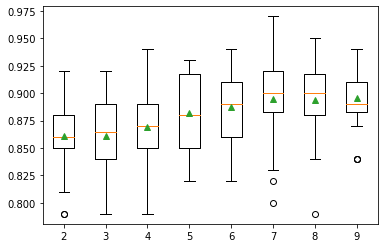

In [13]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### 3.2 Automatically select number of features

In [15]:
X, y = get_dataset()
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[
    ('s', rfe),
    ('m', model)
])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")

Accuracy: 0.893 (0.033)


### 3.3 Which features were selected

In [17]:
X, y = get_dataset()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X, y)
for i in range(X.shape[1]):
  print(f"Column: {i}, Selected: {rfe.support_[i]}, Rank: {rfe.ranking_[i]}")

Column: 0, Selected: False, Rank: 2
Column: 1, Selected: True, Rank: 1
Column: 2, Selected: False, Rank: 4
Column: 3, Selected: True, Rank: 1
Column: 4, Selected: True, Rank: 1
Column: 5, Selected: True, Rank: 1
Column: 6, Selected: False, Rank: 3
Column: 7, Selected: True, Rank: 1
Column: 8, Selected: False, Rank: 6
Column: 9, Selected: False, Rank: 5
